In [57]:
# importing important libraries

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Reading dataset

data = pd.read_csv('winequality_red.csv')

In [59]:
# Reading top rows of dataset

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
# checking shape of dataset

data.shape

(1599, 12)

In [61]:
# Checking info of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [62]:
# checking summary of dataset

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [63]:
# creating x and y

X = data.drop('quality',axis = 1)
y = data['quality']

In [64]:
# creating training and test dataset

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=567)

In [65]:
# fitting the model without preprocessing of data

clas = DecisionTreeClassifier()
clas.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
# checking training score

clas.score(x_train,y_train)

1.0

In [67]:
# Perform Prediction

pred = clas.predict(x_test)

In [68]:
# checking test score

clas.score(x_test,y_test)

0.6125

In [69]:
# implementing PCA to check how much feature is contributing more.

scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

Text(0, 0.5, 'Variation Explained')

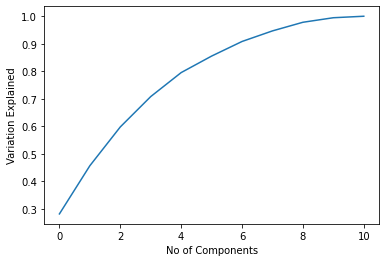

In [70]:
# PCA

pca = PCA()
principal_component = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variation Explained')

In [71]:
# Now based on above graph let's identify that 8 components

pca = PCA(n_components = 8)
X_new = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(X_new,columns=['P1','P2','P3','P4','P5','P6','P7','P8'])
principal_x.head()

,P1,P2,P3,P4,P5,P6,P7,P8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258


In [72]:
# now train out model based on PCA features

# creating training and test dataset

x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state=567)

In [73]:
# fitting the model

clas = DecisionTreeClassifier()
clas.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
# checking training score

clas.score(x_train,y_train)

1.0

In [75]:
# Perform Prediction

pred = clas.predict(x_test)

In [76]:
# checking test score

clas.score(x_test,y_test)

0.62

In [88]:
# Grid Search Algorithm

grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(2,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best','random']
}

In [89]:
grid_search = GridSearchCV(estimator = clas,
                          param_grid = grid_param,
                          cv = 5,
                          n_jobs = -1)

In [90]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [91]:
# printing best possible parameter

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 6, 'min_samples_split': 4, 'splitter': 'random'}


In [94]:
# training our model with best possible parameter

clas = DecisionTreeClassifier(criterion = 'gini', max_depth = 17,min_samples_leaf = 6, min_samples_split = 4, splitter = 'random')
clas.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=6, min_samples_split=4,
                       splitter='random')

In [95]:
clas.score(x_test,y_test)

0.5925